# Introduction to Support Vector Machine

`Support Vector Machine` is a supervised learning algorithm which can be used for both classification and regression challenges. However, it is mostly used in classification problems. In this article, I will be discussing about the `Support Vector Machine` algorithm and how it works.

- [LinkedIn](https://www.linkedin.com/in/pro-programmer/)
- [YouTube](http://www.youtube.com/@itvaya)
- [gtihub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero)
- [Gmail](talukderrishat2@gmail.com)
- [discord](https://discord.gg/ZB495XggcF)

# Introduction

`Support Vector Machine (SVM)` is a simple yet powerful machine learning algorithm that can be used for both `classification` and `regression` tasks.

In most cases, `SVM` is introduced as a `binary classification` algorithm. Given a set of training examples, where each example belongs to one of `two classes`, the `SVM` algorithm learns a rule that assigns new, unseen examples to one class or the other. Since the decision is made based on geometry rather than probabilities, `SVM` is often described as a `non-probabilistic linear classifier`.

An `SVM` model represents data points as vectors in a feature space. The main idea is to position these points in such a way that the two classes can be separated by a boundary, while keeping that boundary as far away as possible from the closest points of each class. Once this boundary is learned, new data points are mapped into the same space and classified based on which side of the boundary they fall on.

More formally, consider a dataset that looks like this:

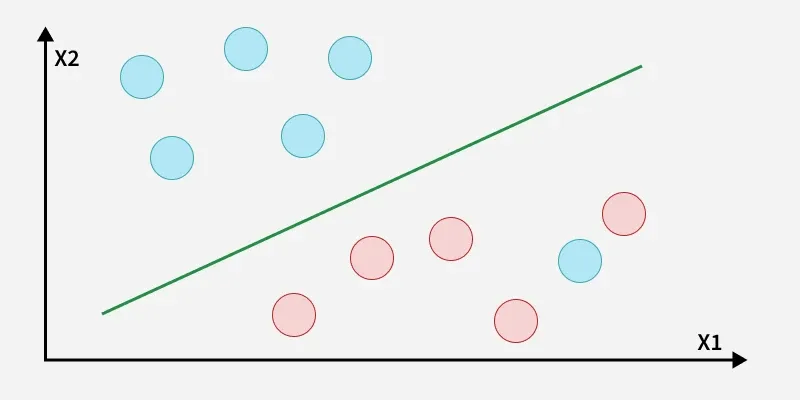

Here, we have `orange` and `blue` points representing two different classes. At first glance, it seems easy to separate them by drawing a straight line. However, if you look closely, you’ll notice that there are actually `many possible lines` that could separate these two classes.

So the natural question becomes:

Which line should we choose?


The line chosen by `SVM` is the one that `maximizes the distance between the two classes`. This optimal separating line is called the `maximum margin hyperplane`. The distance between this line and the closest data points from each class is known as the `margin`.

The data points that lie closest to the hyperplane are especially important. These points are called `support vectors`, and they are the only points that directly influence the position of the hyperplane. The goal of `SVM` is to choose a hyperplane that results in the `largest possible margin`, making the model more robust to small variations in the data.


At this point, you might wonder:

What if the data is not `linearly separable`?

In real-world problems, data is often messy and cannot be perfectly separated by a straight line. To handle this situation, `SVM` uses a technique called the `kernel trick`. Instead of separating the data in its original space, `SVM` transforms the data into a `higher-dimensional space` where a linear separation becomes possible. This process is commonly referred to as `kernelization`.


In this article, we will discuss:

* how the `SVM` algorithm works conceptually
* how to implement `SVM` in `python` using `scikit-learn`
* and how the `kernel trick` helps `SVM` handle non-linear data


## How `SVM` Works

The `SVM` algorithm tries to find a `hyperplane` that best separates the dataset into two classes. In a two-dimensional space, this hyperplane is simply a line. In higher dimensions, it becomes a plane or, more generally, a `hyperplane`.

The hyperplane is chosen such that the `margin between the two classes` is maximized. The margin is defined as the distance between the hyperplane and the closest data points from each class. As mentioned earlier, these closest points are called `support vectors`.

Mathematically, the hyperplane can be represented as:

$$
w^T x - b = 0
$$

Here,

* `w` is the normal vector perpendicular to the hyperplane
* `b` is the bias term
* `x` represents a point in the feature space

This equation divides the feature space into two regions. Points lying on one side of the hyperplane are assigned to one class, while points on the other side are assigned to the second class.

The following visualization can help clarify this idea:

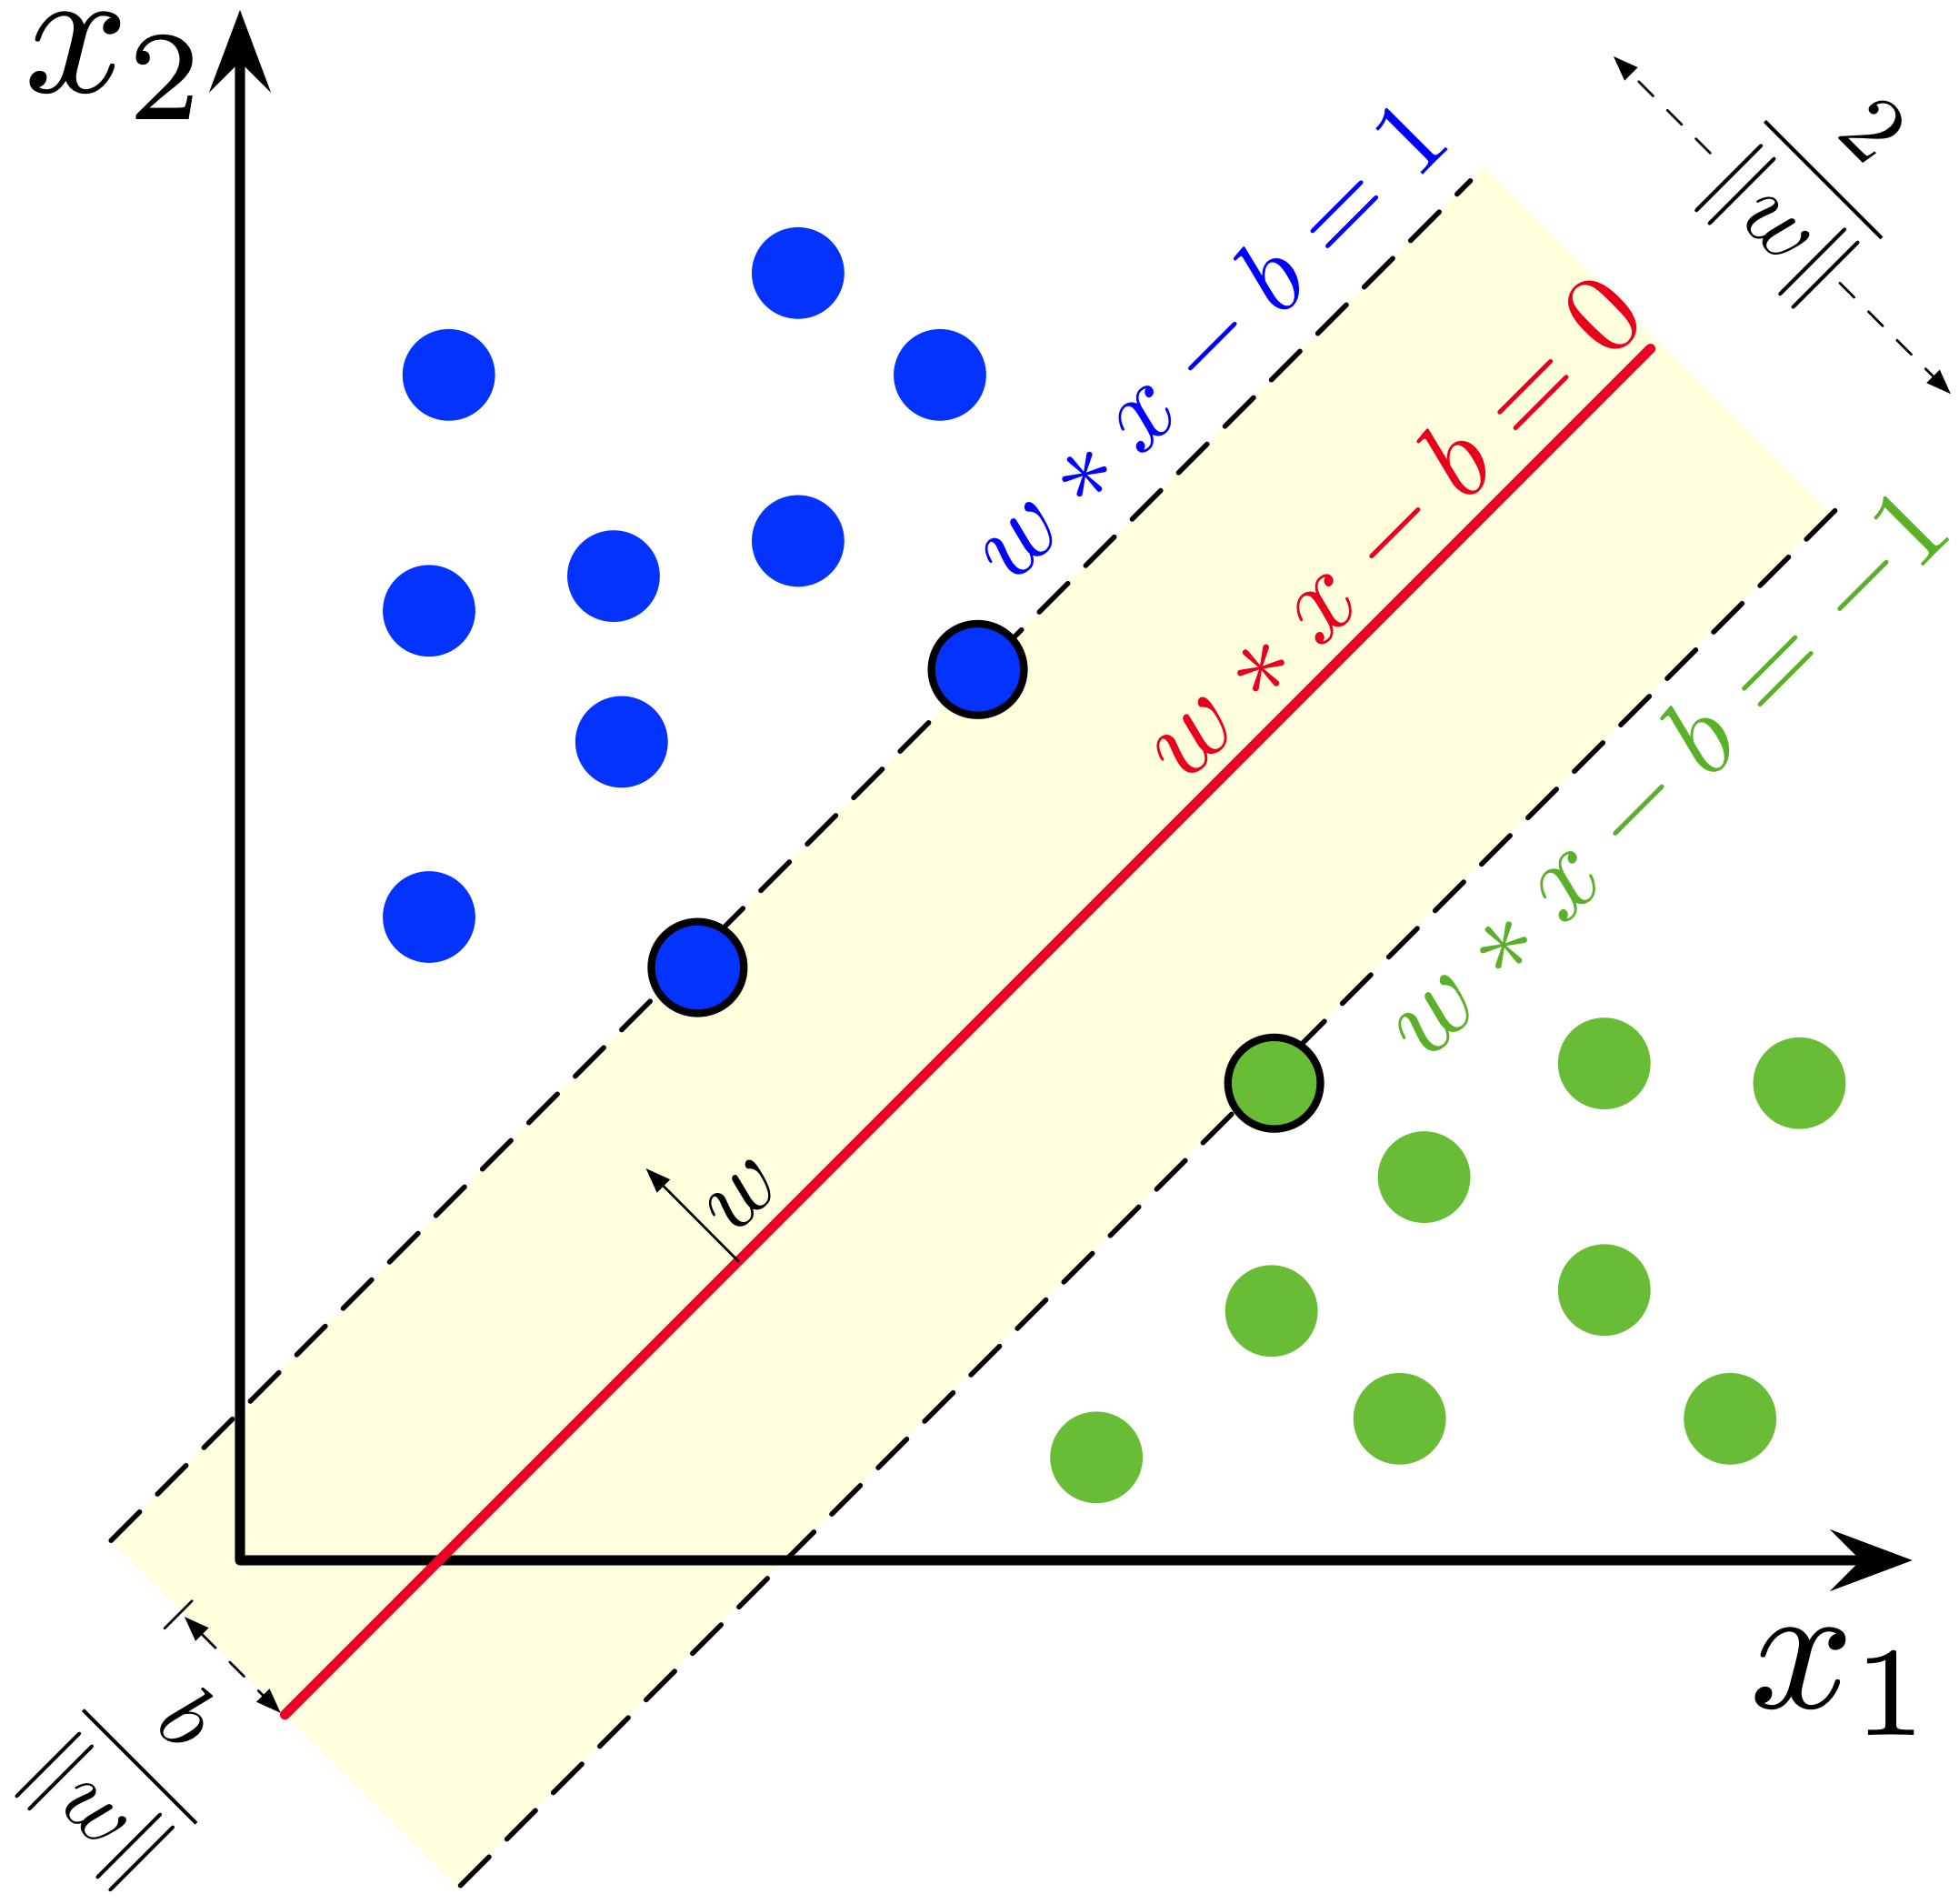

There is a considerable amount of math involved in the `SVM` algorithm, especially when optimization and kernels are discussed. However, the core intuition remains simple: `SVM` tries to place the decision boundary as far away as possible from the nearest data points of each class.

During training, the algorithm iteratively searches for this optimal hyperplane by maximizing the margin while allowing small misclassifications when necessary. This balance between `margin maximization` and `error tolerance` is what makes `SVM` both powerful and reliable.

> Explaining the maths without any visualization is pretty hard. 

> The internal mathematics of `SVM` are complex, but the core idea remains simple: `SVM` tries to place the decision boundary as far away as possible from the nearest data points of each class. You can watch an amazing 3 part video [StatQuest with Josh Starmer](https://www.youtube.com/watch?v=efR1C6CvhmE). Amazing channel btw.


# Implementing `SVM` in `python`

# First we need Data

In [56]:
import pandas as pd
import numpy as np

I'll use the `breast cancer dataset` from `scikit-learn` to train the model.

In [57]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer(as_frame=True)

The `dataset` is leaded and stored in the `cancer` variable. But we need to extract it from the variable.

> it's a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the `.data` member, which is a `n_samples`, `n_features` array. In the case of supervised problem, one or more response variables are stored in the `.target` member.

We can check out it's keys as it is a dictionary-like object.

In [58]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The dataset has `data`, `target`, `frame`, `target_names`, `DESCR`, `feature_names`, `filename` etc. Not all of them are important for us. We will only use `data` and `target` to train the model and `feature_names` and `target_names` to make the data more readable.

SO, I'll start by seeing and `description` of the dataset.

In [59]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

The description shows that the dataset has `569` samples and `30` features. The features are the characteristics of the cell nuclei present in the breast cancer. The target is `binary` and represents the diagnosis of the cancer. `0` represents `malignant` and `1` represents `benign`.

Now let's get the data.

In [60]:
data = cancer.frame
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


The dataframe is made. Now let's see so details.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The data is already clean and ready to be used and as there is a lot of features, I'll be lazy and not do any kind of preprocessing.

## Let's split the data


In [62]:
from sklearn.model_selection import train_test_split

features = data.drop(columns=['target'])
target = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=101)

Now let's train the model.

## Training the model

In [63]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, Y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


The model is trained and and we can now do some predictions and see how well the model performs.

In [64]:
# predicting
predictions = model.predict(X_test) 

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, predictions))
print('\n')
print(classification_report(Y_test, predictions))

[[ 56  10]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



Well, the model has an accuracy of `92%`. This is a good accuracy and most of the time you will get a good accuracy with `SVM` model.

But is this the best accuracy? should we change the hyperparameters and see if we can get a better accuracy?

It's a good choice to actually try out different hyperparameters and see if we can get a better accuracy. But there is a issue.

Let's see how many parameters are there in the `SVM` model.

In [65]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

That's a lot of parameters.

First let me explain what these hyperparameters are.

- `C` is the `penalty` parameter of the `error term`. It controls the trade off between smooth decision boundary and classifying the training points correctly. A large `C` value gives you low bias and high variance and a small `C` value gives you high bias and low variance.
- `gamma` is the `kernel` coefficient for `rbf`, `poly` and `sigmoid`. It controls the influence of a single training example. A large `gamma` value gives you high bias and low variance and a small `gamma` value gives you low bias and high variance.(You have to learn the math behind these to understand these fancy terms)
- `kernel` is the `kernel` type to be used in the algorithm. It can be `linear`, `poly`, `rbf` and `sigmoid`.
- `degree` is the blah blah blah.
- blah blah blah.
- blah

> You have the task to find out which parameter does what.

There you go. You have the knowledge of the hyperparameters. 

So, tuning these parameters and testing them one by one would be a hastle right?

This is where another cross validation method comes into play.

It's called `GRID SEARCH!`.

> This is a cross validation method as well and i've talked about cross validation in a previous article. Please have a look at it. For now, cross validation validates the models performance for the whole dataset by splitting the dataset into multiple folds and testing the model on each fold and then averaging the results.

This is a automated process of testing out all the possible combinations of hyperparameters from a `list of HP(hyperparameters)` and finding the best combination of hyperparameters that gives the best accuracy.

Sklearn provides a `grid search` algorithm to find the best hyperparameters for the model.

In [66]:
#importing the grid search cv
from sklearn.model_selection import GridSearchCV

Now how do we use `GridSearchCV` to find the best hyperparameters for the model?

- We will first make a dictionary of the hyperparameters and their values that we want to try as a list.
- Then we will make a `grid` variable using the `GridSearchCV` class and pass the model, the hyperparameters and the number of `cross validation` to it.

Now let's make a parameter grid.

In [67]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

Now, we can pass this parameter grid to the `grid search` algorithm using the `GridSearchCV` class.

In [68]:
gridSVM = GridSearchCV(
    model,
    param_grid,
    verbose=3 
)

First we made a dictionary of the hyperparameters: 
```python
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
```

Here we are trying `5` different values for `C` and `5` different values for `gamma`. So, we are trying `25` different combinations of hyperparameters.

Which will be tested by the grid search algorithm using cross validation. So, the model will be trained `25` * `k` = `125` times. 

> K stands for `k-fold cross validation`.

Then we define the `grid` variable using the `GridSearchCV` class.

First parameter is the model, second parameter is the hyperparameters, third parameter is the `refit` parameter which is set to `True` and the fourth parameter is the `verbose` parameter which is set to `3`.

The `refit` parameter is set to `True` because we want to refit the model with the best hyperparameters on the whole dataset.

The `verbose` parameter is set to `3` to see the progress of the `grid search` algorithm.

Now we can fit the `grid` variable to the training data.

In [69]:
gridSVM.fit(features, target)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.623 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.623 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.628 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.623 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.623 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.628 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.623 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter 

AAAANNND here you go. The `grid search` algorithm has found the best hyperparameters for the model. 

We can see the best hyperparameters by using the `best_params_` attribute of the `grid` variable.

In [70]:
gridSVM.best_params_ # we are getting the best parameters

{'C': 100, 'gamma': 0.0001}

The best hyperparameters are `{'C': 100, 'gamma': 0.0001}`.

meaning that the best `C` or `penalty` parameter of the `error term` is `100` and the best `gamma` or `kernel` coefficient for `rbf` is `0.0001`.

We can also see the best estimator by using the `best_estimator_` attribute of the `grid` variable. 

In [71]:
model = gridSVM.best_estimator_ # we are getting the best estimator model

model.get_params() # we can see the parameters of the model

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

This is the best performing model with the best hyperparameters.

Now we can make `predictions` using this model directly or make a new model using the best hyperparameters and then make predictions. But why would we do that? We can just use the best performing model to make predictions. 

In [72]:
grid_predictions = gridSVM.predict(X_test) # we are predicting the model

Let's see if the model performs better with the best hyperparameters.

In [73]:
# we are printing the classification report and the confusion matrix
print(confusion_matrix(Y_test, grid_predictions))
print('\n')
print(classification_report(Y_test, grid_predictions))


[[ 64   2]
 [  1 104]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.98      0.99      0.99       105

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



AS you can see we have a better accuracy of `98%` with the best hyperparameters. This is better than the previous accuracy of `92%` with the default hyperparameters.

So, the `grid search` algorithm has indeed found the best hyperparameters for the model.

> Grid search can be used more effectively to find the best hyperparameters for the model. AS this is a demo, I have used only `C` and `gamma` hyperparameters and I hope you have a rough idea of how to use `grid search` to find the best hyperparameters for the model.

> Grid search is not only used in `SVM` but also in all the other models to find the best hyperparameters for the model.

# Final Words

Non-probabilistic algorithms are hard to understand but easy to master.

Happy learning!